## TASK 3 - Scene recognition with Bag of Visual Words

Group Number: #INSERT HERE


### 1 Data import and Preparation

Complete the class ***SceneDataset*** in ***dataset.py*** and load the training and test dataset. (images and class labels)

In [16]:
%load_ext autoreload
%autoreload 1
%aimport features, dataset, utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import numpy as np
import features
import dataset
import utils
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

#student_code start
train_path = "./data/scene/train/"
test_path =  "./data/scene/test/"
train_dataset = dataset.SceneDataset(train_path)
test_dataset = dataset.SceneDataset(test_path)

train_images = train_dataset.get_data()[0]
test_images = test_dataset.get_data()[0]
class_names = test_dataset.get_class_names()[0]
#student_code end

print('Imported test data: ',len(test_images))
print('Imported training data: ', len(train_images))
print(class_names)


Imported test data:  400
Imported training data:  1600
['forest', 'bedroom', 'office', 'coast', 'tallbuilding', 'street', 'livingroom', 'mountain', 'kitchen', 'store']


###  2 Build Vocabulary and Clusters

Extract SIFT features from the training data using ***features.extract_dsift(..)*** and then utilize the descriptors to generate visual words with ***KMeans(...).fit(...).cluster_centers_*** from ***sklearn.neighbors***. Set the sample size per image at about **100** and a step size around **5**. For cluster size, try a value around **50**. You can adapt the paramater to achieve better results. If clustering takes too long, have a look at the parameters **n_init** and **max_iter** of ***KMeans(...)***.

_***HINT:***_
***KMeans(..)*** expects the features to be a stacked 2D matrix instead of a list (np.vstack(...)).


In [18]:
#student code start
train_descriptors_1 = np.array(features.extract_dsift(train_images, stepsize=5, num_samples=100))
print(train_descriptors_1[0])
train_clusters = KMeans(n_clusters=50).fit(np.vstack(train_descriptors_1)).cluster_centers_
print(train_clusters[0])
#student code end

DSIFT Extraction: {0.8310523749998993}  seconds
[[94. 14. 10. ...  1.  2.  3.]
 [ 0.  4. 11. ...  0.  0.  0.]
 [ 0. 18. 54. ... 51. 37. 55.]
 ...
 [ 5.  7.  1. ...  1.  1.  2.]
 [ 2.  7.  9. ... 13.  7. 19.]
 [ 1. 12.  8. ... 43. 32. 13.]]
[ 6.776844   5.924898   8.596827   6.1105423  7.07407    5.714163
  8.457689   5.948659   7.3187885  6.4080906  9.991499   5.992964
  5.8724327  6.7144804 12.278759   7.97869    6.5391846  5.842781
  9.641598   5.706009   6.596201   7.6733704 12.110531   7.13818
  6.3712397  4.82821    7.8005123  4.681203   5.822544   5.7406883
  7.998596   5.184211  25.071552  15.2221155 17.255028  12.430039
 16.637997  17.65532   28.910038  27.025856  26.797363  13.5327
 15.616291  11.595512  16.40556   26.733974  51.749218  40.127495
 16.678028  10.936167  15.574501  13.463007  23.596872  37.22068
 50.36841   26.635841  13.542675   9.462254  14.567482  12.0170355
 20.514345  23.385756  26.651443  14.19092   60.199753  28.397444
 23.537346  19.233112  28.067303  30

###  3 Classification

Generate a histogram per image using the centroids. First extract the dense SIFT features of the training set again. This time use a smaller stepsize (eg. 1 or 2) and take all samples.

After, implement ***count_visual_words(..)*** in ***features.py*** to obtain a histogram per image. Build a kNN classifier with ***KNeighborsClassifier(..)*** and fit the the model with the histogram data of the training images and training labels. Set the neighbourhood size to **3**.


In [33]:
#student code start
train_descriptors_2 = np.array(features.extract_dsift(train_images, stepsize=2))
train_histograms = features.count_visual_words(train_descriptors_2, train_clusters)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_histograms, train_dataset.get_data()[1])
#student code end

DSIFT Extraction: {3.536035042000094}  seconds
Counting visual words: {18.060007499999756}  seconds


KNeighborsClassifier(n_neighbors=3)

### 4 Evaluation

Examine the accuracy of your model by extracting the dense SIFT points of the test set with the same stepsize as before, generate the histogams and predict the labels of the test set with the previously fitted classifier. Plot your results with ***utils.plot_confusion_matrix(..)***.

_***HINT:***_
Use the methods ***predict(..)*** and ***score(..)*** on the KNN classifier.


***Submission:*** Save the confusion matrix with the KNN score as **task3_accuracy_test_data.png** using ***utils.plot_confusion_matrix(..)***.



DSIFT Extraction: {0.6959139580003466}  seconds
Counting visual words: {4.101518125000439}  seconds


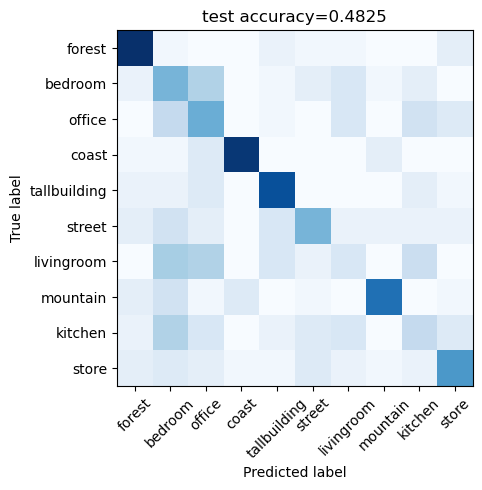

In [47]:
#student code start
test_descriptors = np.array(features.extract_dsift(test_images, stepsize=2))
test_histograms = features.count_visual_words(test_descriptors, train_clusters)

test_label_predictions = neigh.predict(test_histograms)
test_label_scores = neigh.score(test_histograms, test_dataset.get_data()[1])

utils.plot_confusion_matrix(test_dataset.get_data()[1], test_label_predictions, test_label_scores, class_names)
#student code end

***
#### Q1: Analyze the confusion matrix. Are there classes which can be more easily identified than others. What could be the reason? What classes perform worst, and explain your answer.


Forest, Coast and Tallbuilding are recognized the best, we suppose because they have unique visual-words (e.g. leafs, sea/horizon, windows). Classes which are semantically close (e.g. indoor) like bedroom, livingroom and kitchen share alot of common visual-words (e.g. chairs, tables, fabrics).


Take some own test images and investigate if they can be correctly classified with you trained model. For instance, take a photo of your own kitchen or living room and classify it. You should at least test one photo from three of the ten categories. Make sure the images are resized and cropped to 100x100.

***Submission:*** Save the confusion matrix with the model score as **task3_accuracy_custom_data.png** using ***utils.plot_confusion_matrix(..)***.

In [62]:
#student_code start

import cv2

# Load test dataset
test_path =  "./data/custom/"
test_dataset_o = dataset.SceneDataset(test_path)
test_images_o = test_dataset.get_data()[0]
class_names_o = test_dataset_o.get_class_names()

# Make images square and grayscale
square_images_o = []
for image in test_images_o:
    h, w = image.shape
    s = min(h, w)
    crop_img = image[0:s, 0:s]
    crop_img = cv2.resize(crop_img, (100, 100), interpolation = cv2.INTER_AREA)
    square_images_o.append(crop_img)
    
test_descriptors_o = np.array(features.extract_dsift(square_images_o, stepsize=2))
test_histograms_o = features.count_visual_words(test_descriptors_o, train_clusters)

test_label_predictions_o = neigh.predict(test_histograms_o)
test_label_scores_o = neigh.score(test_histograms_o, test_dataset_o.get_data()[1])

utils.plot_confusion_matrix(test_dataset_o.get_data()[1], test_label_predictions_o, test_label_scores_o, class_names_o)
#student code end
#student_code end

DSIFT Extraction: {0.6254405419995237}  seconds
Counting visual words: {4.095260250000138}  seconds


ValueError: Found input variables with inconsistent numbers of samples: [10, 400]